In [51]:
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,ds,y
0,1980.0,35.77
1,1981.0,28.86
2,1982.0,16.79
3,1983.0,50.36
4,1984.0,53.94


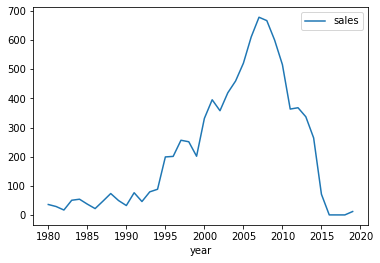

In [52]:
data = pd.read_csv("vgsales.csv")
year_publisher_gsales = data[["Year","Publisher","Global_Sales"]]
sorted = year_publisher_gsales.sort_values(by="Year").head()
year_sales = year_publisher_gsales[["Year", "Global_Sales"]]
year_min = year_sales["Year"].min()
year_max = year_sales["Year"].max()
years = int(year_sales["Year"].max()-year_sales["Year"].min())
year_sales_cumulative = [0]*years #np.zeros([1, years], dtype=int)
years_x = []
for row in year_sales.iterrows():
    try:
        year_sales_cumulative[int(row[1]["Year"]-year_min)-1] += row[1]["Global_Sales"]
    except:
        # print("error on year: ", row[1]["Year"])
        pass
for i in range(years):
    years_x.append(i+year_min)

df_cumulative = pd.DataFrame(data={"year":years_x, "sales":year_sales_cumulative})
df = df_cumulative
df.plot(x="year",y="sales")


df.columns = ["ds","y"]
df.dropna(subset = ["ds"], inplace=True)
df.head()

<AxesSubplot:xlabel='ds', ylabel='y'>

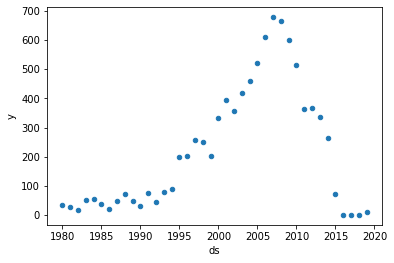

In [53]:
df_ordered = df.sort_values(["ds"])
df_ordered.plot.scatter(x="ds", y="y")

In [54]:
df.columns = ["ds","y"]
df.dropna(subset = ["ds"], inplace=True)
df_formated = df
for i in range(len(df)-1):
    try:
        df_formated["ds"][i] = str(int(df["ds"][i]))+"-01-01"
    except Exception:
        # print(Exception)
        pass
df_formated.head()

,ds,y
0,1980-01-01,35.77
1,1981-01-01,28.86
2,1982-01-01,16.79
3,1983-01-01,50.36
4,1984-01-01,53.94


In [55]:
pro = Prophet()
model = pro.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
future = model.make_future_dataframe(periods=10,freq='Y')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000002019,20.365101,-273.490687,199.776694,20.365101,20.365101,-54.785175,-54.785175,-54.785175,-54.785175,-54.785175,-54.785175,0.0,0.0,0.0,-34.420073
1,1980-01-01 00:00:00.000000000,109.952191,-165.917227,304.257373,109.952191,109.952191,-48.625048,-48.625048,-48.625048,-48.625048,-48.625048,-48.625048,0.0,0.0,0.0,61.327143
2,1981-01-01 00:00:00.000000000,118.930525,-175.426846,281.667207,118.930525,118.930525,-57.150198,-57.150198,-57.150198,-57.150198,-57.150198,-57.150198,0.0,0.0,0.0,61.780326
3,1982-01-01 00:00:00.000000000,127.884327,-162.821512,300.879661,127.884327,127.884327,-54.785175,-54.785175,-54.785175,-54.785175,-54.785175,-54.785175,0.0,0.0,0.0,73.099153
4,1983-01-01 00:00:00.000000000,136.838130,-127.633640,322.193378,136.838130,136.838130,-51.942275,-51.942275,-51.942275,-51.942275,-51.942275,-51.942275,0.0,0.0,0.0,84.895855


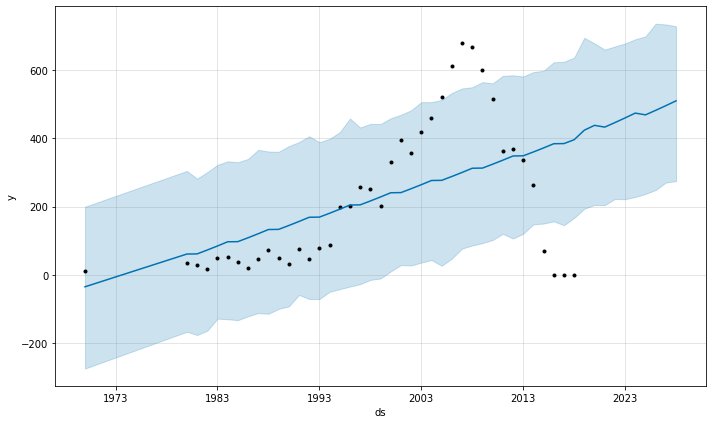

In [72]:
plot1 = pro.plot(forecast)

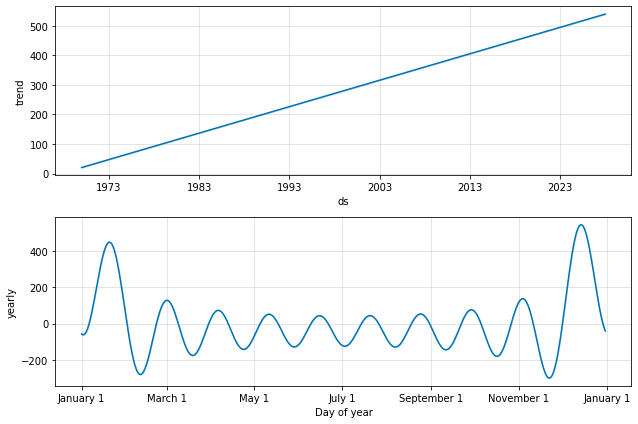

In [73]:
plt2 = pro.plot_components(forecast)